Step 1
- Load the data 
- inspect the data
- Clean up the data from outliers
- create a method to calculate the throuput and avergare out the user

In [157]:
from pandas import pandas as pd

FOLDER = 'data/'
FILE = 'data.csv'

df = pd.read_csv(FOLDER + FILE) 


In [158]:
df.sort_values('movement_time', ascending=False)



,uuid,user_age,device,computer_time,target_object_id,misses,movement_time,index_difficulty
774,f03cac9f-8548-43aa-a2b9-de0d4e3135f6,54,Mouse,10,21,2,35.063,2.996
506,fa2558fd-5af8-495d-9bd1-cc550f0964cb,22,Mouse,5,16,0,24.554,4.203
736,8218f964-9ddc-4369-885f-3851eddecee7,61,Mouse,1,13,0,7.676,2.659
392,71a9bf81-f720-4655-8f6f-4f6728e37dd2,26,Mouse,6,11,5,6.643,1.839
781,f03cac9f-8548-43aa-a2b9-de0d4e3135f6,54,Mouse,10,0,3,5.981,2.055
...,...,...,...,...,...,...,...,...
720,9ccf3d9b-909d-4dd4-857c-197fbb349584,23,Mouse,8,8,0,0.380,1.796
528,fa2558fd-5af8-495d-9bd1-cc550f0964cb,22,Mouse,5,20,0,0.375,1.275
723,9ccf3d9b-909d-4dd4-857c-197fbb349584,23,Mouse,8,3,0,0.367,1.346
728,9ccf3d9b-909d-4dd4-857c-197fbb349584,23,Mouse,8,7,0,0.363,2.449


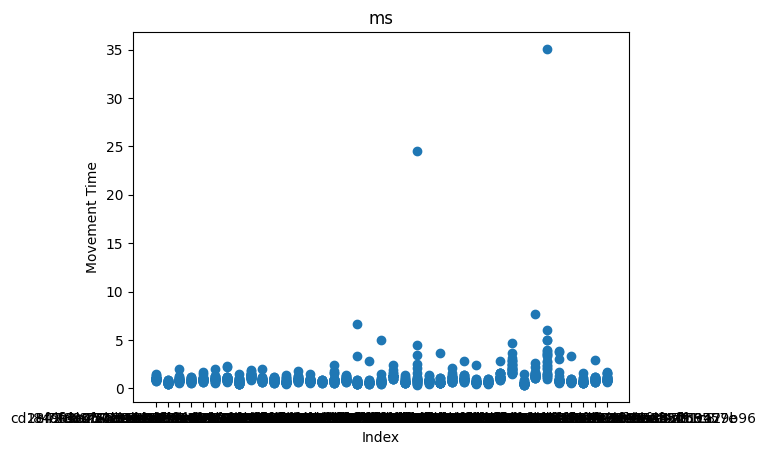

In [159]:
from matplotlib import pyplot 

pyplot.scatter(df['uuid'], df['movement_time'])
pyplot.xlabel('Index')
pyplot.ylabel('Movement Time')
pyplot.title('ms')
pyplot.show()

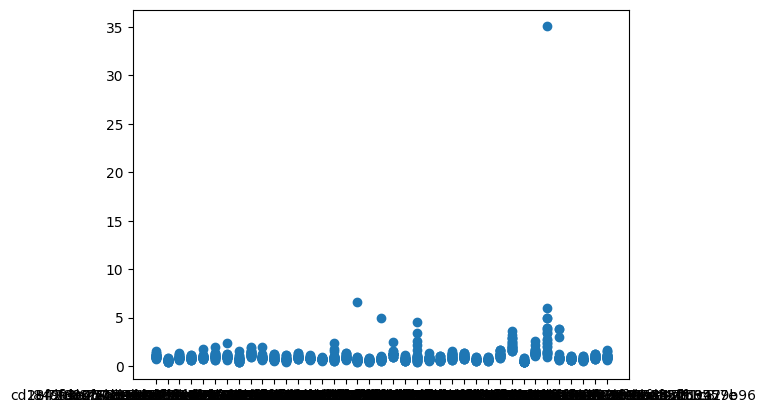

In [160]:
# Remove the first entry for every user
def remove_first_entry_per_user(dataframe):
    drop_indices = []
    seen = set()
    
    for index, row in dataframe.iterrows():
        uuid = row['uuid']
        if uuid in seen:
            continue
        drop_indices.append(index)
        seen.add(uuid)
        
    return dataframe.drop(index=drop_indices).reset_index(drop=True)

main_data = remove_first_entry_per_user(df)
main_data.shape

pyplot.scatter(main_data['uuid'], main_data['movement_time'])

In [170]:

columns_to_show = ['uuid', 'movement_time', 'target_object_id']
pd.concat([df[columns_to_show].head(50), main_data[columns_to_show].head(50)], axis=1)


,uuid,movement_time,target_object_id,uuid,movement_time,target_object_id
0,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.117,20,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.000,9
1,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.000,9,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.100,2
2,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.100,2,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.833,13
3,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.833,13,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.883,12
4,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.883,12,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.900,21
5,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.900,21,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.834,22
6,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.834,22,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.350,19
7,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.350,19,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.950,11
8,cd1842cb-4771-4c16-9de8-cc3e1bf66275,0.950,11,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.050,5
9,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.050,5,cd1842cb-4771-4c16-9de8-cc3e1bf66275,1.533,16


(857, 8)

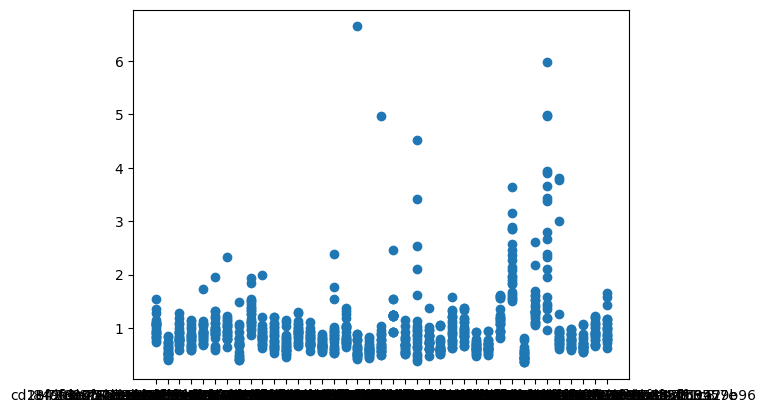

In [161]:
MOVEMENT_TIME_THRESHOLD = 10

def remove_high_mt_outliers(dataframe, threshold):
    return dataframe[dataframe['movement_time'] <= threshold]

data_cleaned = remove_high_mt_outliers(main_data, MOVEMENT_TIME_THRESHOLD)
pyplot.scatter(data_cleaned['uuid'], data_cleaned['movement_time'])
data_cleaned.shape


(207, 8)

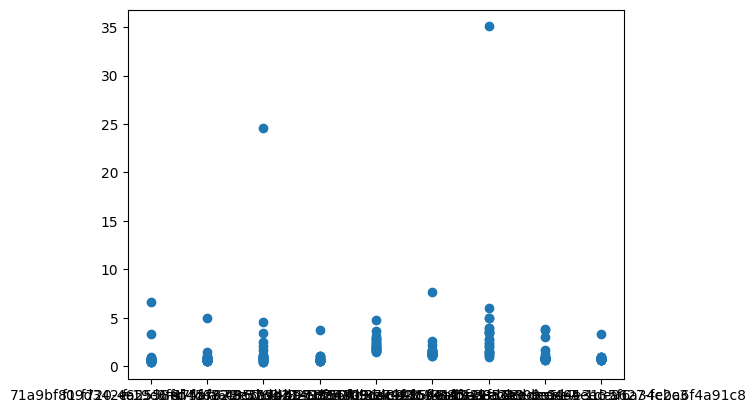

In [162]:
NON_SUSPICIOUS_MOVEMENT_TIME_THRESHOLD = 3

def get_suspicious_movement_times(dataframe):
    suspicious_uuids = []
    
    for _ , row in dataframe.iterrows():
        if row['movement_time'] > NON_SUSPICIOUS_MOVEMENT_TIME_THRESHOLD:
            suspicious_uuids.append(row['uuid'])
    
    return dataframe[dataframe['uuid'].isin(suspicious_uuids)]

suspicious_uuids = get_suspicious_movement_times(data)
pyplot.scatter(suspicious_uuids['uuid'], suspicious_uuids['movement_time'])
suspicious_uuids.shape



In [163]:
# Remove the first entry for every user
def remove_first_entry_per_user(dataframe):
    drop_indices = []
    seen = set()
    
    for index, row in dataframe.iterrows():
        uuid = row['uuid']
        if uuid in seen:
            continue
        drop_indices.append(index)
        seen.add(uuid)
        
    return dataframe.drop(index=drop_indices).reset_index(drop=True)

data_no_first_entries = remove_first_entry_per_user(data)

data.shape

data_no_first_entries.shape


(858, 8)